In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Model,Sequential
from keras.layers import Input, Dense,Conv1D,MaxPooling1D,Flatten,Activation,BatchNormalization, Dropout

Using TensorFlow backend.


In [2]:
##load data index
train_index_path=r'D:\USDA_back1\bacteria data\05012019_5 bacteria in broth Data_Metal Halide\5_samples_data_fusion_paper\index_file\train_index.csv'
valide_index_path=r'D:\USDA_back1\bacteria data\05012019_5 bacteria in broth Data_Metal Halide\5_samples_data_fusion_paper\index_file\valide_index.csv'
test_index_path=r'D:\USDA_back1\bacteria data\05012019_5 bacteria in broth Data_Metal Halide\5_samples_data_fusion_paper\index_file\test_index.csv'
train_index=pd.read_csv(train_index_path)['0'].values.astype(np.int)
valide_index=pd.read_csv(valide_index_path)['0'].values.astype(np.int)
test_index=pd.read_csv(test_index_path)['0'].values.astype(np.int)

In [3]:
####load spectral data
spectral_data_path=r'D:\USDA_back1\bacteria data\05012019_5 bacteria in broth Data_Metal Halide\5_samples_data_fusion_paper\All_spectrum_Nor_SNV.csv'
spectral_data=pd.read_csv(spectral_data_path).drop(columns=['No','Class']).values
y_all=pd.read_csv(spectral_data_path)['Class'].values
x_spectral_train=spectral_data[train_index]
x_spectral_valide=spectral_data[valide_index]
x_spectral_test=spectral_data[test_index]
y_train=y_all[train_index]
y_valide=y_all[valide_index]
y_test=y_all[test_index]
from sklearn import preprocessing
spectral_scaler = preprocessing.StandardScaler().fit(x_spectral_train)
x_spectral_train_st=spectral_scaler.fit_transform(x_spectral_train)
x_spectral_valide_st=spectral_scaler.fit_transform(x_spectral_valide)
x_spectral_test_st=spectral_scaler.fit_transform(x_spectral_test)


In [4]:
####load shape feature data
shape_data_path=r'D:\USDA_back1\bacteria data\05012019_5 bacteria in broth Data_Metal Halide\5_samples_data_fusion_paper\All_shape_factor.csv'
shape_data=pd.read_csv(shape_data_path).drop(columns=['No','Class']).values
y_shape_all=pd.read_csv(shape_data_path)['Class'].values
x_shape_train=shape_data[train_index]
x_shape_valide=shape_data[valide_index]
x_shape_test=shape_data[test_index]
y_shape_train=y_shape_all[train_index]
y_shape_valide=y_shape_all[valide_index]
y_shape_test=y_shape_all[test_index]
from sklearn import preprocessing
shape_scaler = preprocessing.StandardScaler().fit(x_shape_train)
x_shape_train_st=shape_scaler.fit_transform(x_shape_train)
x_shape_valide_st=shape_scaler.fit_transform(x_shape_valide)
x_shape_test_st=shape_scaler.fit_transform(x_shape_test)

In [5]:
#####TO GET IMAGE DATA
from tqdm import tqdm
def get_data(folder):
    X = []
    y = []
    z = []
    for cell_type in os.listdir(folder):
        if not cell_type.startswith('.'):
            if cell_type in ['Ecoli']:
                label = 1
                label2 = 1
            elif cell_type in ['Listeria']:
                label = 2
                label2 = 2
            elif cell_type in ['SA']:
                label = 3
                label2 = 3
            elif cell_type in ['ST']:
                label = 4
                label2 = 4
            elif cell_type in ['Campy']:
                label = 0
                label2 = 0
            for pro_name in tqdm(os.listdir(folder +'/'+ cell_type)):
                img_data = imread(folder + '/'+cell_type + '/' + pro_name)
                if img_data is not None:
                    img_file = d_resize(img_data)
                    X.append(img_file)
                    y.append(label)
                    z.append(label2)
    X = np.asarray(X)/10000   
    X=X[:,:,:,np.newaxis]
    y = np.asarray(y)
    z = np.asarray(z)
    return X,y,z
def d_resize(image):        ###to resize image
    resized_img=[]
    max_dim =64
    h, w = image.shape[:2]
    top_pad = (max_dim - h) // 2
    bottom_pad = max_dim - h - top_pad
    left_pad = (max_dim - w) // 2
    right_pad = max_dim - w - left_pad
    padding = [(top_pad, bottom_pad), (left_pad, right_pad)]
    image_new = np.pad(image, padding, mode='constant', constant_values=0)
    return(image_new)

In [6]:
###To get image
from skimage.external.tifffile import imread
data_path = r'D:\USDA_back1\bacteria data\05012019_5 bacteria in broth Data_Metal Halide\5_samples_data_fusion_paper\img_file_all_16'
x_img_16, y_img_16, z_img_16 = get_data(data_path)
classes=5
x_img_train=x_img_16[train_index]
x_img_valide=x_img_16[valide_index]
x_img_test=x_img_16[test_index]
y_img_train=np_utils.to_categorical(y_img_16[train_index],classes)
y_img_valide=np_utils.to_categorical(y_img_16[valide_index],classes)
y_img_test=np_utils.to_categorical(y_img_16[test_index],classes)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1954.53it/s]


In [7]:
###shape data :LSTM data_format
classes=5
x_shape_train_lstm=np.expand_dims(x_shape_train_st,axis=1)
x_shape_test_lstm=np.expand_dims(x_shape_test_st,axis=1)
x_shape_valide_lstm=np.expand_dims(x_shape_valide_st,axis=1)
y_shape_train_lstm = np_utils.to_categorical(y_shape_train,classes)
y_shape_test_lstm = np_utils.to_categorical(y_shape_test,classes)
y_shape_valide_lstm = np_utils.to_categorical(y_shape_valide,classes)

In [8]:
####spectra :CNN data_format
classes=5
x_spectral_train_cnn=np.expand_dims(x_spectral_train_st,axis=2)
y_spectral_train_cnn = np_utils.to_categorical(y_train,classes)
x_spectral_valide_cnn=np.expand_dims(x_spectral_valide_st,axis=2)
y_spectral_valide_cnn = np_utils.to_categorical(y_valide,classes)
x_spectral_test_cnn=np.expand_dims(x_spectral_test_st,axis=2)
y_spectral_test_cnn = np_utils.to_categorical(y_test,classes)

In [9]:
####1D-CNN model
spectral_cnn_model_in = Input((89,1))
spectral_cnn_model =(Conv1D(128,5,activation="relu"))(spectral_cnn_model_in)
spectral_cnn_model = (Dropout(0.3))(spectral_cnn_model)
spectral_cnn_model =(BatchNormalization())(spectral_cnn_model)
spectral_cnn_model =(MaxPooling1D(pool_size=2))(spectral_cnn_model)
spectral_cnn_model_flatten =(Flatten())(spectral_cnn_model)
spectral_cnn_model_dense =(Dense(100,activation='relu'))(spectral_cnn_model_flatten )
spectral_cnn_model =(Dropout(0.3))(spectral_cnn_model_dense)
spectral_cnn_model_out =(Dense(5,activation='softmax'))(spectral_cnn_model)
spectral_cnn_model_final=Model(inputs=spectral_cnn_model_in,outputs=spectral_cnn_model_out)
spectral_cnn_model_final.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['acc'])
spectral_cnn_model_final.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 89, 1)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 85, 128)           768       
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 128)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 85, 128)           512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 42, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5376)              0         
____________________

In [10]:
##### LSTM model
from keras.layers import LSTM
from keras.layers import LeakyReLU
from keras.models import Model,Sequential
from keras.layers import Input, Dense,Conv1D,MaxPooling1D,Flatten,Activation,BatchNormalization, Dropout
lstm_shape_model_in = Input((1,9))
lstm_shape_model=(LSTM(64,return_sequences=True))(lstm_shape_model_in)
for i in range(2-1):
    if i >0:
        lstm_shape_model=(LSTM(64,return_sequences=True))(lstm_shape_model)   
lstm_shape_model_flatten=(Flatten())(lstm_shape_model) 
lstm_shape_model_1=(Dropout(0.1))(lstm_shape_model_flatten) 
lstm_shape_model_dense=(Dense(600,activation='relu'))(lstm_shape_model_1) 
lstm_shape_model_out=(Dense(5,activation='softmax'))(lstm_shape_model_dense)
lstm_shape_model_final=Model(inputs=lstm_shape_model_in,outputs=lstm_shape_model_out)
lstm_shape_model_final.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['acc'])
lstm_shape_model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1, 9)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             18944     
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 600)               39000     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 3005      
Total params: 60,949
Trainable params: 60,949
Non-trainable params: 0
_________________________________________________________________


In [11]:
###To build identity_block & convolutional_block
def identity_block(X, f, filters, stage, block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
    X_shortcut = X
    
    ##### MAIN PATH #####
    #First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

def convolutional_block(X, f, filters, stage, block, s=2):

    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X
        

In [12]:
#To build to ResNet 50
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
import keras.backend as K
K.set_image_data_format('channels_last')   
input_shape = (64, 64, 1)
X_input = Input(input_shape)
X = ZeroPadding2D((3, 3))(X_input)

#Stage 1
X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
X = BatchNormalization(axis = 1)(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL
X = AveragePooling2D(pool_size=(2,2), padding='same')(X)

    # Output layer
X = Flatten()(X)
X_output = Dense(2048, activation='relu')(X)
X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X_output)
       
    # Create model
Res_50_model = Model(inputs = X_input, outputs = X, name='ResNet50')

Res_50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
Res_50_model.summary()









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 70, 70, 1)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 32, 32, 64)   128         conv1[0][0]                      
__________________________________________________________________________________________________
ac

In [13]:
###Stack model together to build FusionNet
import tensorflow as tf
from keras.layers import Lambda
from keras.layers import concatenate
import keras
feature_merged_layer=concatenate([spectral_cnn_model_dense,lstm_shape_model_dense,X_output])
feature_merged_dense=Dense(2748,activation='relu')(feature_merged_layer)
fusion_output=Dense(5,activation='softmax')(feature_merged_dense)
data_fusion_model=Model(inputs=[spectral_cnn_model_in,lstm_shape_model_in,X_input],outputs=fusion_output)
data_fusion_model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['acc'])
data_fusion_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 70, 70, 1)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 32, 32, 64)   128         conv1[0][0]                      
__________________________________________________________________________________________________
activation

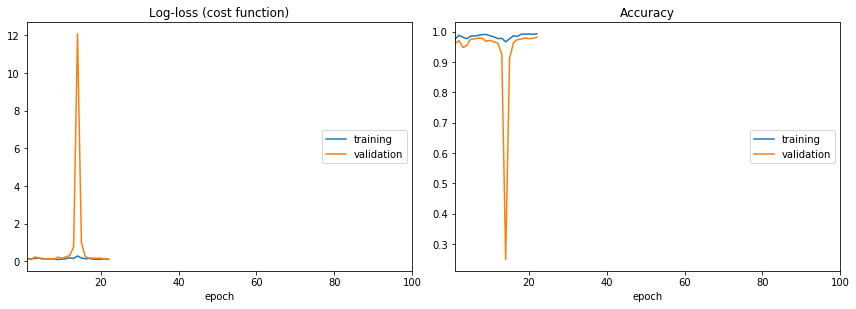

Log-loss (cost function):
training   (min:    0.091, max:    0.278, cur:    0.102)
validation (min:    0.091, max:   12.085, cur:    0.109)

Accuracy:
training   (min:    0.966, max:    0.993, cur:    0.993)
validation (min:    0.249, max:    0.981, cur:    0.981)


In [30]:
####FusionNet Model Training  ##We've already completed training part(computer with low-capacity memory may die during the model training). 
###Please directly use model loading part in the next step. 
#from keras.callbacks import ReduceLROnPlateau,EarlyStopping
#import livelossplot
#from keras.callbacks import ModelCheckpoint
#fusion_model_name = r'E:\bacteria data\05012019_5 bacteria in broth Data_Metal Halide\5_samples_data_fusion_paper\model_save\data_fusion_model_07_12_trail.h5'
#checkpointer = ModelCheckpoint(fusion_model_name, save_best_only=True)
#plot_losses = livelossplot.PlotLossesKeras()
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=20, mode='auto')
#early_stop=EarlyStopping(monitor='val_loss',patience=20, verbose=0)
#data_fusion_model.fit([x_spectral_train_cnn,x_shape_train_lstm,x_img_train],y_img_train, batch_size=64,nb_epoch=100,validation_data=([x_spectral_valide_cnn,x_shape_valide_lstm,x_img_valide],y_img_valide),callbacks=[plot_losses,checkpointer,reduce_lr,early_stop])

In [14]:
###Load well-trained FusionNet model
###The result of validate set
fusion_model_name = r'D:\USDA_back1\bacteria data\05012019_5 bacteria in broth Data_Metal Halide\5_samples_data_fusion_paper\model_save\data_fusion_model_07_12_trail.h5'
data_fusion_model.load_weights(fusion_model_name)
data_fusion_model.evaluate([x_spectral_valide_cnn,x_shape_valide_lstm,x_img_valide],y_img_valide)

900/900 [==============================] - 6s 6ms/step


[0.09133762192826705, 0.97]

In [15]:
###The result of test set
data_fusion_model.evaluate([x_spectral_test_cnn,x_shape_test_lstm,x_img_test],y_img_test)

500/500 [==============================] - 1s 2ms/step


[0.05396333909733221, 0.984]

In [17]:
####code for ROC_AUC 
from sklearn.metrics import roc_curve, auc
from keras.utils import np_utils
from scipy import interp
classes=5
def fpr_tpr_roc_auc(classifier,x,y):
    y_predict=classifier.predict_proba(x)
   # y_predict_onehot=np_utils.to_categorical(y_predict,classes)
    y_onehot=np_utils.to_categorical(y,classes)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i],y_predict[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return(fpr,tpr,roc_auc)
def svm_fpr_tpr_roc_auc(classifier,x,y):
    y_predict=classifier.decision_function(x)
    y_onehot=np_utils.to_categorical(y,classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i],y_predict[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return(fpr,tpr,roc_auc)

In [18]:
###Code for ROC_plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
font0=matplotlib.font_manager.FontProperties()
font0.set_style('italic')

def roc_plot(fpr,tpr,roc_auc,classifier):
    sns.set(font_scale=2)
    sns.set_style('white')
    lw=4
    colors=['b', 'g', 'r', 'c', 'm']
    plt.figure(figsize=(8,6), dpi=1000)
    sns.lineplot(x=fpr["macro"], y=tpr["macro"],lw=lw)
    plt.plot(fpr[0], tpr[0], lw=lw)
    for i, color in zip(range(classes-1), colors):
        sns.lineplot(x=fpr[i+1], y=tpr[i+1], lw=lw)
    plt.legend(['Average (area = {1:0.2f})'''.format(0, roc_auc["macro"]),'C. jejuni (area = {1:0.2f})'''.format(1, roc_auc[0]),'E. coli (area = {1:0.2f})'''.format(2, roc_auc[1]),'L. innocua (area = {1:0.2f})'''.format(3, roc_auc[2]),'S. aureus (area = {1:0.2f})'''.format(4, roc_auc[3]),'S. Typhimurium (area = {1:0.2f})'''.format(5, roc_auc[4])],prop=font0,labelspacing=0.4,fontsize=54,title='Species')
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve of '+classifier)
    sns.despine()
    return()

In [19]:
#Code for confusion_matrix plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
def make_confusion_matrix(classifier,x,y):
    y_pred=classifier.predict(x)
    cm=confusion_matrix(y,y_pred)
    return(cm)
def print_confusion_matrix(confusion_matrix, class_names,classifier,figsize = (8,6)):
    font0=matplotlib.font_manager.FontProperties()
    font0.set_style('italic')
    sns.set(font_scale=2)
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize, dpi=1000)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontproperties=font0)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontproperties=font0)
    plt.ylabel('True species')
    plt.xlabel('Predicted species')
    plt.title('Confusion matrix of '+classifier)
    return fig

In [20]:
####Code for Neural Net ROC_AUC plot (1DCNN,LSTM,ResNet& FusionNet )
from sklearn.metrics import roc_curve, auc
from keras.utils import np_utils
from scipy import interp
classes=5
def nn_fpr_tpr_roc_auc(classifier,x,y):
    y_predict=classifier.predict(x)
    y_onehot=y
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i],y_predict[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return(fpr,tpr,roc_auc)

In [21]:
####Code for Neural Net Confusion_Matrics (1DCNN,LSTM,ResNet& FusionNet )
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
def nn_make_confusion_matrix(classifier,x,y):
    y_pred=classifier.predict(x)
    cm=confusion_matrix(y.argmax(1),y_pred.argmax(1))
    return(cm)

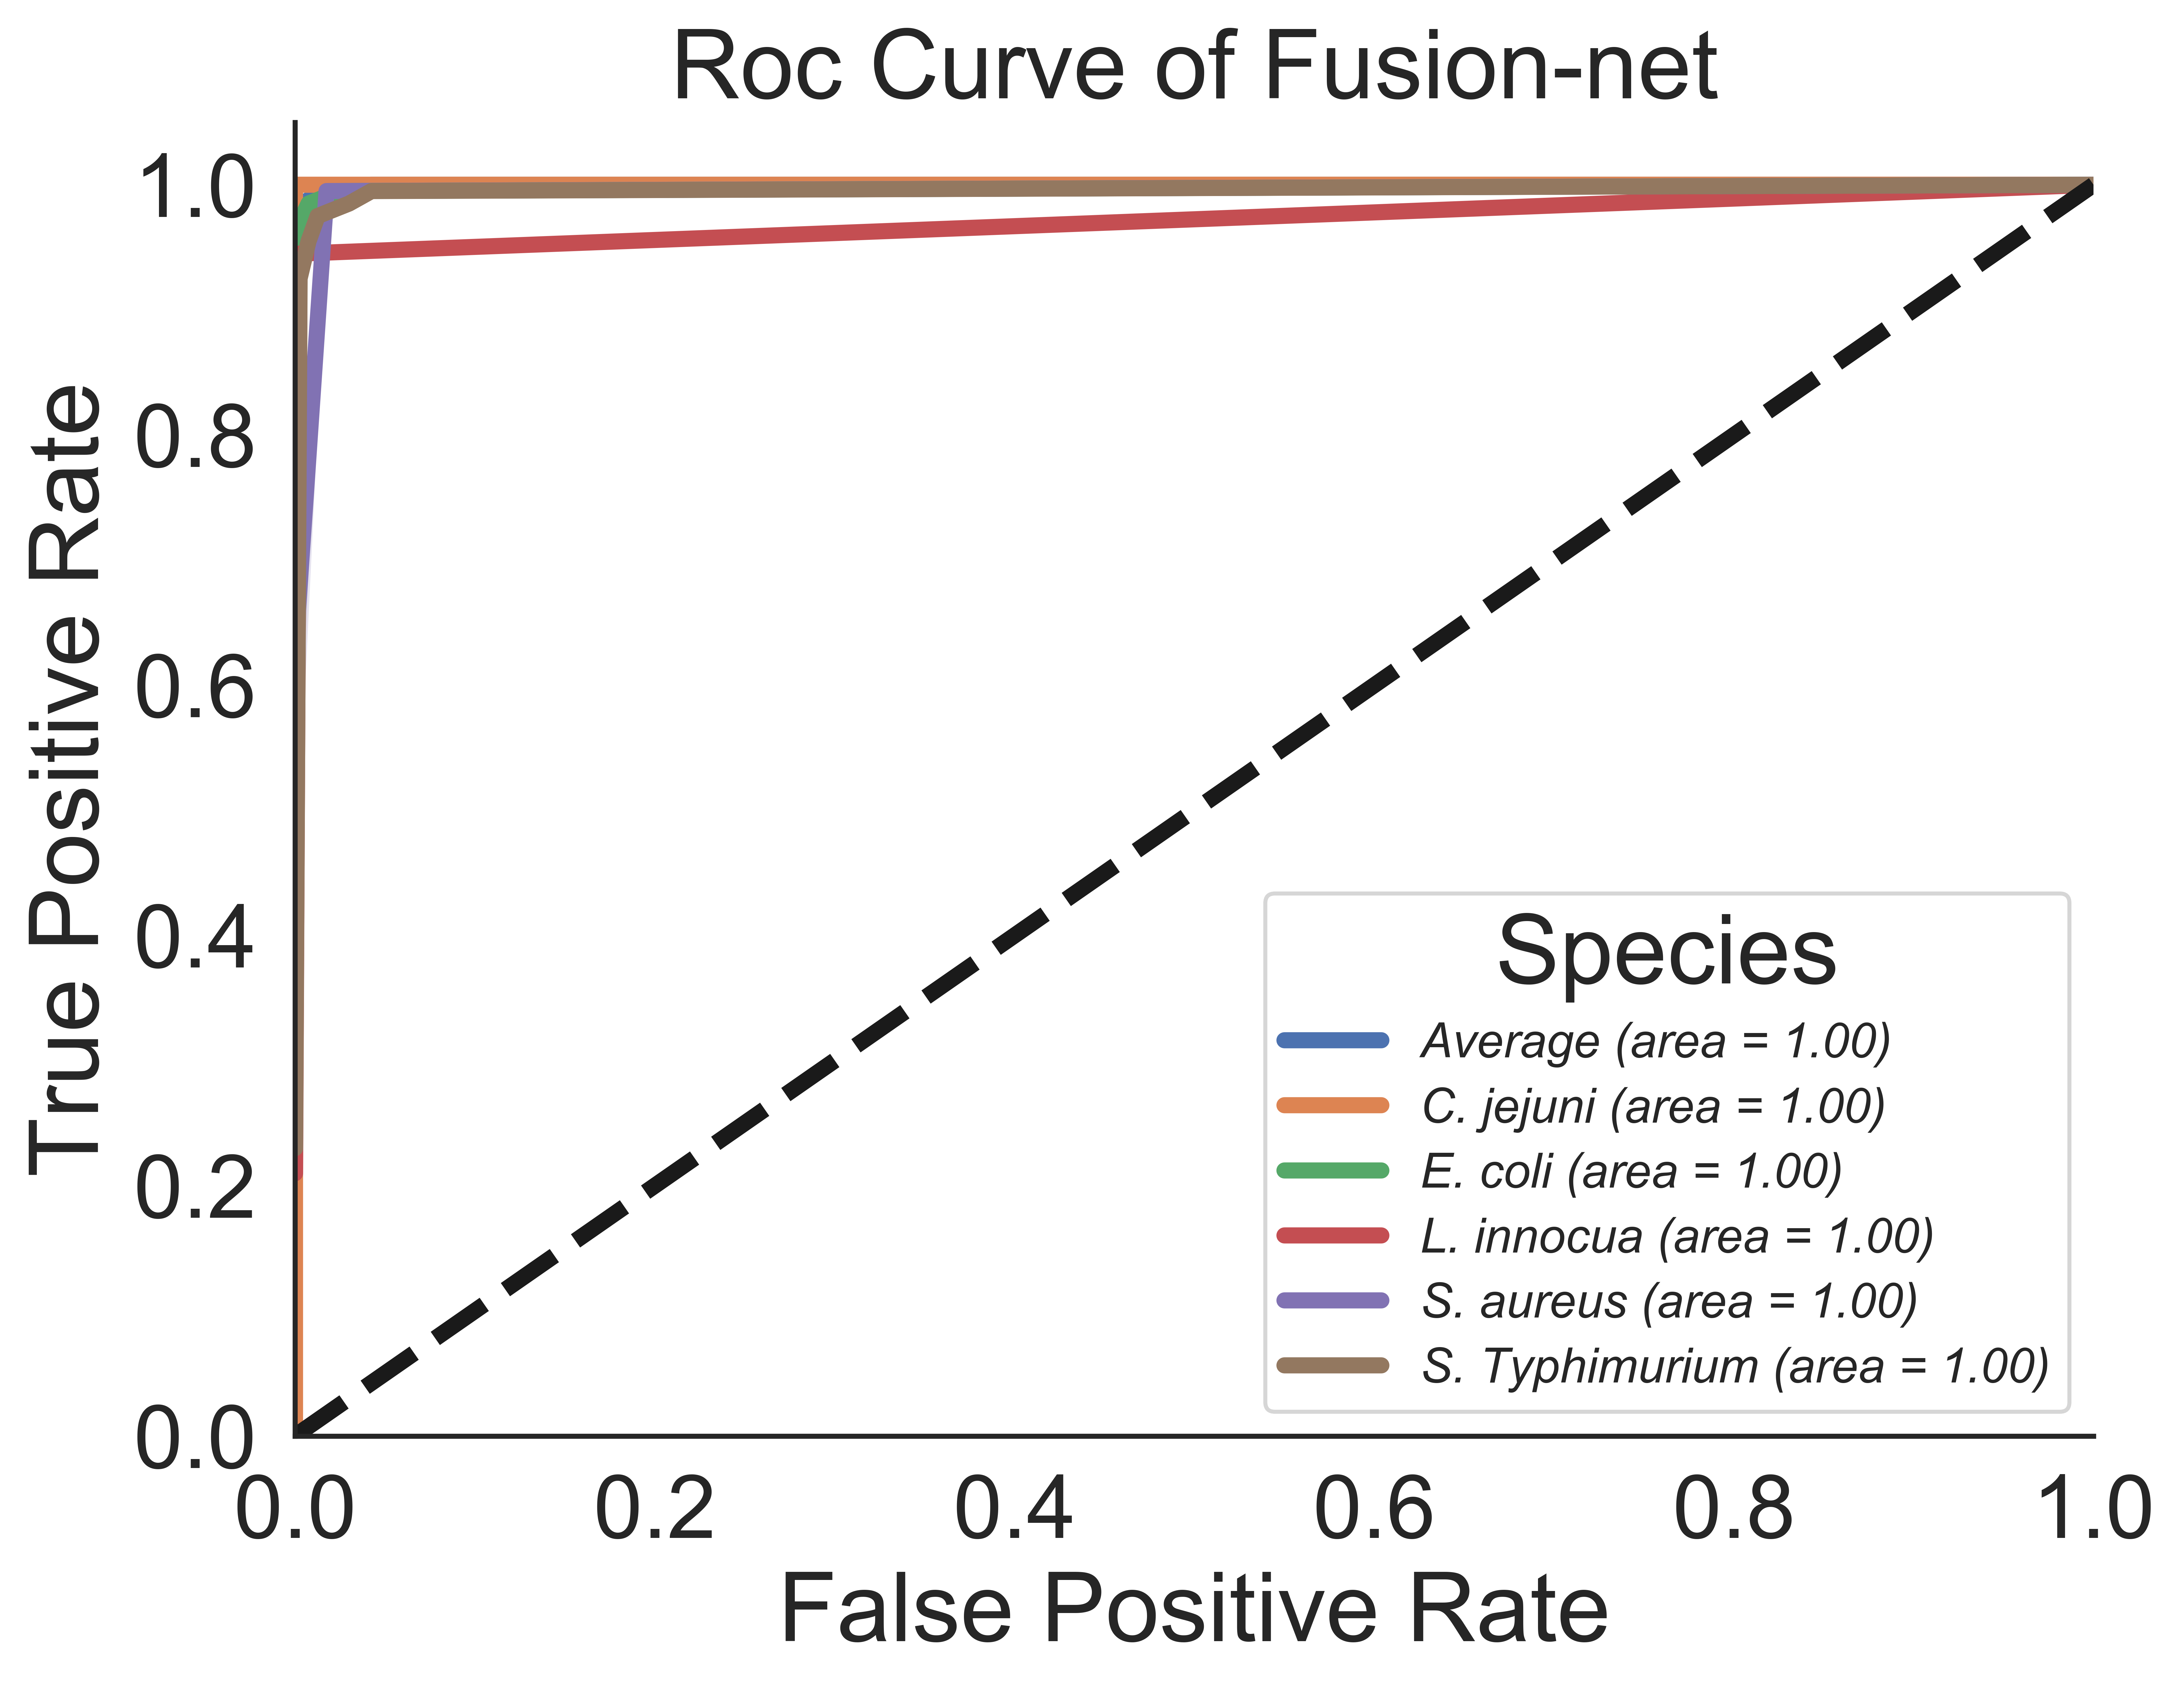

In [22]:
####Plot FusionNet ROC_AUC
fusion_fpr,fusion_tpr,fusion_roc_auc=nn_fpr_tpr_roc_auc(data_fusion_model,[x_spectral_test_cnn,x_shape_test_lstm,x_img_test],y_img_test)
p=roc_plot(fusion_fpr,fusion_tpr,fusion_roc_auc,'Fusion-net')

In [23]:
####Plot FusioNET Confusion matrics
class_names=['C. jejuni','E. coli','L. innocua','S. aureus','S. Typhimurium']
cnn_plot=print_confusion_matrix(nn_make_confusion_matrix(data_fusion_model,[x_spectral_test_cnn,x_shape_test_lstm,x_img_test],y_img_test),class_names,'Fusion-net')